<a href="https://colab.research.google.com/github/Brendannigel/Navier-Stokes/blob/master/Step_7_2D_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D ##library for 3d projection plots
%matplotlib inline

In [0]:
###variable declarations
nx = 31
ny = 31
nt = 17
nu = .05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .25
dt = sigma * dx * dy / nu

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))  # create a 1xn vector of 1's
un = numpy.ones((ny, nx))

###Assign initial conditions
# set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2  

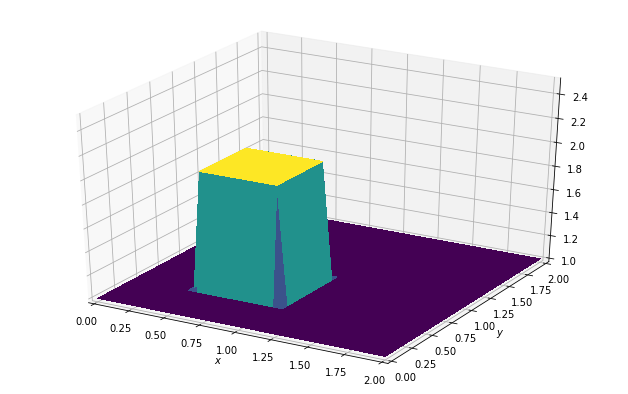

In [5]:
fig = pyplot.figure(figsize=(11, 7))
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(1, 2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [0]:
###Run through nt timesteps
def diffuse(nt):
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2  
    
    for n in range(nt + 1): 
        un = u.copy()
        u[1:-1, 1:-1] = (un[1:-1,1:-1] + 
                        nu * dt / dx**2 * 
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                        nu * dt / dy**2 * 
                        (un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1

    
    fig = pyplot.figure(figsize=(11,7))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=True)
    ax.set_zlim(1, 2.5)
    ax.set_xlabel('$x$')

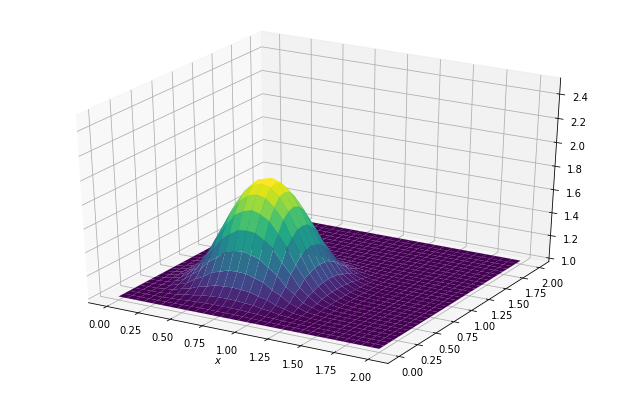

In [7]:
diffuse(10)

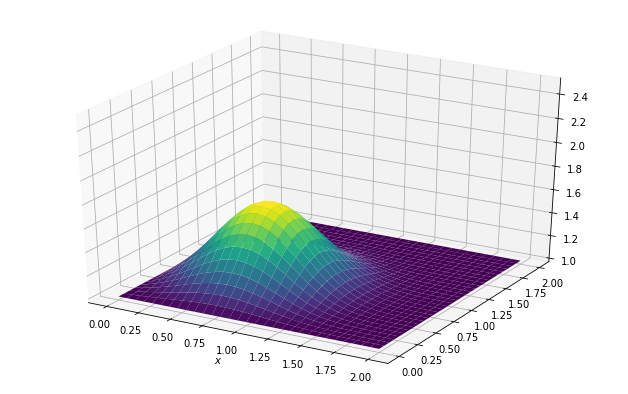

In [8]:
diffuse(25)

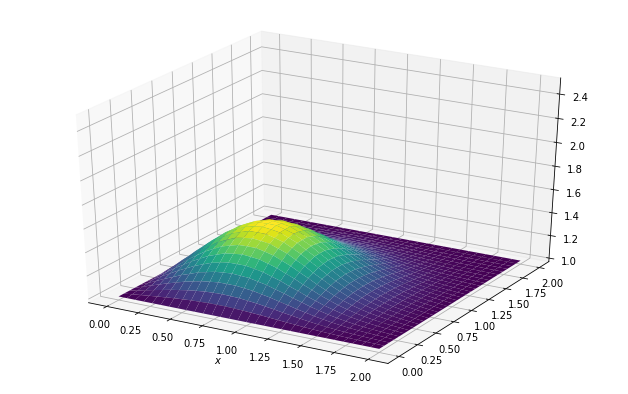

In [9]:
diffuse(50)

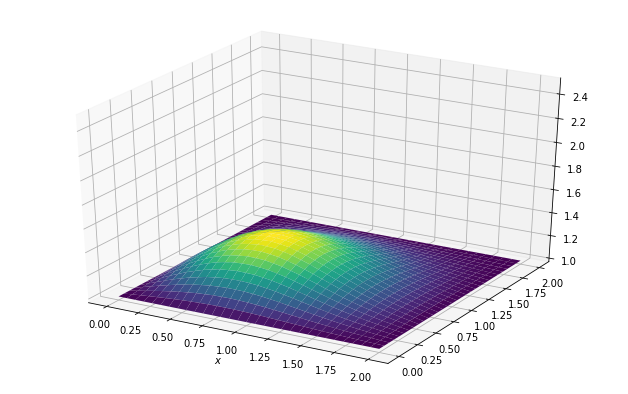

In [10]:
diffuse(75)

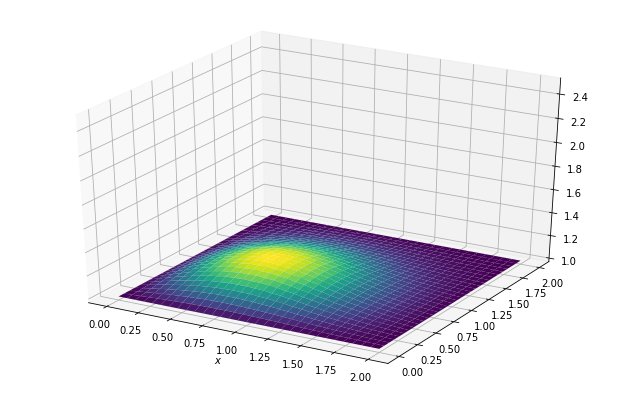

In [14]:
diffuse(100)

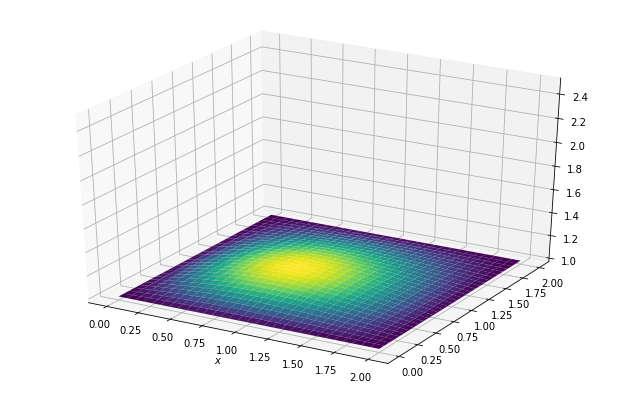

In [18]:
diffuse(200)

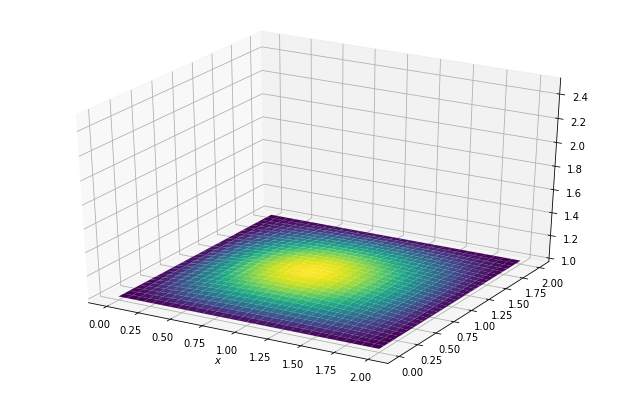

In [19]:
diffuse(300)